# Lecture 1: Introduction to Statistics

The title of this lecture might be misleading because whilst the content of this notebook shares a lot of content with intro stats courses, the manner and pace in which the content will be delivered assumes basic knowledge of the topic. A more appropriate title is "A Quick Brush up on Statistics In the Context of Finance". 

The main topics of discussion are the following:

 1. Financial Data
 2. Financial Returns
 3. Statistical Variables
 4. Sample Statistics
 5. Two Dimensional Frequency Distributions
 6. Measures of Association 
 
which should hopefully be a good start to the course.

**Warning:** Throughout this notebook I will build custom functions to import data that may not be in line with the industry standard. One may even notice that I'm almost rushing through the content. This pace will be unique to this notebook as the future ones should be smoother and slower.


In [12]:
#Importing standard libraries

import numpy as np
from matplotlib import pyplot as plt 
import scipy as sci
import pandas as pd

## Financial Data

The datasets commonly used while solving financial problems are the following:

 - Stock Data
     - stock prices: stocks don't have intrinsic "prices" but are rather defined as what one is willing to sell it for (ask) and what one is willing to buy it for (bid). Although if not specified, one is likely refering to the mid-price, which is defined by (bid + ask)/2 
     - frequency: a given time period (intraday, daily, monthly)
     
 - Balance Sheets
     - Earnings Before Interest and Taxes (EBIT) / Return on Assets (ROA)
     - assets (current assets, fixed assets)
 
 - Insurance Claims
     - number of claims
     - size of claims
 
 - Macroeconomic Variables
     - interest rates
     - GDP growth
     

While we will try to diversify examples and applications, the main focus will be on Stock Data. 

### Example 1: $BRK.A returns 

The following image represents the (log) returns of Berkshire Hathaway A Class stock from 2016 to 2021:


<img src="assets/logreturnsbrka.png" width="400px">

As one can see, the volatility of this stock (and every stock for that matter) is not constant. For example, Fig. 1 indicates that during early March 2020, the volatility of the $BRK.A spiked as we see extreme returns in both directions. This was due to the 2020 _crash_ and _correction_ which came as a result of the COVID 19 pandemic. 

The paragraph above is an example of a _stylized fact_, or a fact that one simply observes but cannot (or doesn't care to) explain. This is usually expressed as a general truth that ignores details, for example "stocks tend to go up in the long term", or "volatility will constantly vary" which we took from the $BRK.A example.


### Example 2: BTC Trading Volume

The following image represents the trading volume (in billions USD) of Bitcoin between 2020 and June 2022:

<img src="assets/btcvolume.png" width="400px">


Looking at Fig. 2, it is obvious that the trading volume of Bitcoin varies tremendously from period to period (in extreme examples, even day to day). This is important to study as a holder of Bitcoin, because one should plan to sell in a period of liquidity, to maximize your profits.


### Example 3: Danish Fire Insurance Claims 

The following image represents the claim sizes (in millions of DKK) for fire insurance in Denmark between 1980 and 1990:


<img src="assets/danishfire.png" width="400px">


As one can see, in the case of Danish Fire insurance, there are periods where the claims are small and don't tend to fluctuate, but every once in a while, there is an outlier event which causes massive spikes (for example, ~August 1980). Such datasets require a totally different set of models to work with as compared to the first two examples.

### Getting Equity Data in Python

As mentioned above, we will be primarily focused on using stock data in this notebook. It was also mentioned that the standard "stock price" used when refering to daily data is the _closing mid-price_. The following is a demonstration of importing the closing mid-price of Google stock between Jan 1, 2016 and Dec 31, 2020.

In [2]:
from pandas_datareader import data ## This import allows us to import stock price data from yahoo finance

print('$GOOG Stock Data:')
data.DataReader('GOOG','yahoo','2016-01-01','2020-12-31') # data.DataReader(ticker,'yahoo',startDate,endDate) 



$GOOG Stock Data:


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,37.202999,36.562901,37.150002,37.091999,65456000,37.091999
2016-01-05,37.599998,36.931999,37.322498,37.129002,39014000,37.129002
2016-01-06,37.359001,36.445999,36.500000,37.181000,38940000,37.181000
2016-01-07,36.924999,35.952999,36.515499,36.319500,59274000,36.319500
2016-01-08,36.661499,35.650002,36.572498,35.723499,49018000,35.723499
...,...,...,...,...,...,...
2020-12-24,87.300003,86.455498,86.750000,86.942497,6936000,86.942497
2020-12-28,89.536400,87.316750,87.581749,88.804497,27860000,88.804497
2020-12-29,89.622002,87.804497,89.389503,87.935997,25988000,87.935997


#### Getting Specific Prices (High, Low, etc):

In [3]:
goog_price = data.DataReader('GOOG','yahoo','2016-01-01','2020-12-31')

#For this demo, we'll get Adjusted Close values
goog_adj_close = goog_price['Adj Close']

goog_adj_close

Date
2016-01-04    37.091999
2016-01-05    37.129002
2016-01-06    37.181000
2016-01-07    36.319500
2016-01-08    35.723499
                ...    
2020-12-24    86.942497
2020-12-28    88.804497
2020-12-29    87.935997
2020-12-30    86.975998
2020-12-31    87.594002
Name: Adj Close, Length: 1259, dtype: float64

In [4]:
#One can generalize the entire process by the following function

def get_stock_price(ticker, start='2016-01-01', end='2020-12-31',price_type = 'Adj Close'):
    return data.DataReader(ticker,'yahoo',start,end)[price_type]


Text(0.5, 1.0, 'NFLX 2020 Stock Data')

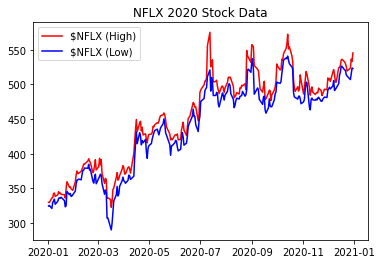

In [5]:
# For example, let's use the function above to plot $FB High and Low data throughout 2020

fb_high = get_stock_price('NFLX','2020-01-01','2021-01-01','High')
fb_low = get_stock_price('NFLX','2020-01-01','2021-01-01','Low')

plt.plot(fb_high, color='red',label='$NFLX (High)')
plt.plot(fb_low, color='blue',label='$NFLX (Low)')

plt.legend()
plt.title('NFLX 2020 Stock Data')

## Financial Returns


Return: the amount of change an asset has experienced in a given timeframe (e.g "my investment in $TSLA has given me a 20% return in the last 12 days")

When speaking about return, one typically means one of two things:

1. Simple Returns: the change an asset experiences in $t \rightarrow t'$. It is defined as:

\
$$R_{t'} = \frac{P_{t'} - P_{t}}{P_{t}}$$

2. Log Returns, which are defined as

\
$$r_{t'} = \log{\frac{P_{t'}}{P_t}} = \log{(1 + R_{t'})}$$


 - Note: people tend to work with log returns because they're continuous.
 
 
 
#### Advantage of Log Returns

Say we define a period as the time between $t = i - 1$ and $t = i$, where $i \in \{1,2,\dots, T\}$. The log return between times $i - 1$ and $i$ (i.e 1 period) becomes $Y_i = \log(P_i) - \log(P_{i - 1})$. We can define $Y(T) as$

$$Y(T) = \log{\frac{P_T}{P_0}}$$

which we could rewrite as

$$Y(T) = \log{P_T} - \log{P_{T-1}} + \log{P_{T-1}} - \log{P_{T-2}} + \dots \log{P_{1}} - \log{P_{0}}$$

$$= Y_T + Y_{T-1} + \dots + Y_2 + Y_1$$

$$ = \sum_{i = 1}^T Y_i$$

In other words, $Y(T)$, often called the _buy and hold return_ is equal to the sum of returns over each period. This property does not hold for simple returns. 

**Example:** Say you buy a stock today, and you define a period one day: the log return today is 5percent today, tomorrow 3percent  and then  -20 percent after tomorrow, the buy and hold return in this three day peroid is 3+5-20 = -15%

### Log Return of a Stock In Python

In [6]:
## Function that gets the log return of a stock between startDate and endDate (not efficient)

def log_return(ticker,startDate,endDate):
    dataset = data.DataReader(ticker,'yahoo',startDate, endDate)['Adj Close']
    return np.log(dataset[-1]/dataset[0])

log_return('GOOG','2020-01-01','2020-12-01')

0.2738413550389493

In [7]:
#Let's  break it into 3 equal periods and see if they add up to the same number above

log_return('GOOG','2020-01-01','2020-04-01') + log_return('GOOG','2020-04-01','2020-08-01') + log_return('GOOG','2020-08-01','2020-12-01')


0.2795963923006757

 As you can see, both results are virtually equivalent

#### Advantage of simple returns

We showed that the advantage of the log return is that given some period, the log return of that period is equivalent to the sum of log returns of the partitions of said period, and that this quality does not hold for simple returns. 

Simple Returns, however, are useful in another way: The simple return of a portfolio is equal to the weighted sum of the simple returns of the constituents of the portfolio.

Say you have a portfolio $P$ consisting of $n$ assets with a weight vector $\vec{w} = \{w_1, w_2, \dots, w_n\}$ and a simple returns vector $\vec{R} = \{R_1, R_2, \dots, R_n\}$ where $w_i$ and $R_i$ represent the weight and simple return of the $i$-th asset in the portfolio, respectively. The simple return of the portfolio is then equivalent to

$$R_P = \sum_{i=1}^n w_i  R_i$$ 

$$ = \vec{w} . \vec{R}$$

### Portfolio Simple Returns Calculator in Python

In [8]:
#Function that gets the simple return of a portfolio in a given period (HIGHLY INEFFICIENT)

def portfolio_simple_return(equities, weights, startDate='2020-01-01',endDate='2021-01-01'):
    returns = [] #Initializing the returns vector
    for i in equities: 
        stock_data = data.DataReader(i,'yahoo',startDate, endDate)['Adj Close']
        returns.append((stock_data[-1] - stock_data[0])/stock_data[0])
    
    return np.dot(returns, weights) #Dot product between return vector and weight vector


#Getting the simple return of a 3 stock portfolio consisting of 25% google, 25% netflix and 50% tesla
portfolio_simple_return(['GOOG','NFLX','TSLA'], [0.25,0.25,0.5])    

3.830434176245283

## Statistical Variables:

 - Levels of Measurement: Classification of variables according to the nature of information they carry:
     - Nominal Scale (eg gender)
     - Ordinal Scale (eg grades)
     - Interval Scale (eg temperature)
     - Metric Scale (eg temperature)

## Sample Statistics

Often when attempting to study a system, one would find that the population size is too large (for example, trying to study the relationship between IQ and SAT scores). A common method to get around this is to collect a random sample which is meant to represent the entire population. This is what is known as sample statistics and is very useful. For example, if one wants to test a roulette strategy, they can test it on 1000 games (that should hopefully be enough to realize that those _strategies_ are nonsense). 

### Basic Heads or Tails Sampling

Here we want to simulate flipping a coin by using a random number generator. For this example we will use the `numpy.random` library. We will use the `randint()` function to generate a random boolean. We define 0 as Heads and 1 as Tails.

In [9]:
def coin_flip():
    flip_result = np.random.randint(0,2) #generates either a 0 or 1 with 50/50 probability
    if flip_result == 0:
        return 'H'
    else:
        return 'T'
    
samples = [coin_flip() for i in range(15)] #Sampling the coinflip 15 times

print('Result:', samples)
print('% of H:', samples.count('H')/len(samples))
print('% of T:', samples.count('T')/len(samples))
print('% of H + % of T:', samples.count('H')/len(samples)+samples.count('T')/len(samples))

Result: ['T', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'T', 'T', 'H']
% of H: 0.6666666666666666
% of T: 0.3333333333333333
% of H + % of T: 1.0


### Useful Parameters in Sample Statistics:


Say we have observe a variable $x$ a total of $n$ times (i.e we have a sample size of $n$), then we can say

$x = \{x_1, x_2, \dots x_n\}$

To make sense of this data, one can get a set of statistical parameters such as averages and skewness measures. The following are the main examples:

    - Median:
    
The median $x_{med}$ is defined as 

$$ x_{med}=   \left\{
\begin{array}{ll}
      x_{(n+1)/2} & \textrm{for odd n}  \\
      x_{\frac{1}{2}(x_{n/2} + x_{n/2 + 1})} & \textrm{for even n}\\
\end{array} 
\right.  $$


    - Mean: 
    
There are two main types of mean, the arithmetic mean, which is defined as follows:

$$\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$$

And the geometric mean, which is defined as follows:

$$\bar{x}_{geom} = \left(\prod_{i = 1}^n x_i \right)^{1/n}$$


    - Range:

The difference $x_n - x_1$

    - Interquartile Range (defining the "inner 50%"):

$$dQ = x_{0.75} - x_{0.25}$$


    - Empirical Variance and Standard Deviation:
    
 The variance of x is defined as 

$$\sigma^2 = \frac{1}{n-1}\sum_{i=0}^n (x_i - \hat{x})^2$$

and the standard deviation is defined as

$$\sigma = \sqrt{\sigma^2}$$


    - Sample Skewness: 

$${\mu}^3 = \frac{m_3}{\sigma ^3}$$

where $m_3 = \frac{1}{n}\sigma_{i=1}^n (x_i - \hat{x})^3$



    - Sample Kurtosis:

$${\mu}^4 = \frac{m_4}{\sigma ^4}$$

where $m_4 = \frac{1}{n}\sigma_{i=1}^n (x_i - \hat{x})^4$
    


I will assume prior knowledge of all these parameters, although if you need a proper definition, there are several resources online. 


### Python Implementation

Note that all of these measures are simple to code up. In fact, I recommend building functions that map an input `list` to a `float` that represent these parameters. Although for breivity's sake I'll just use the ones on numpy and scipy.

In this implementation, we are going to roll two dice and getting the sum of their results. For example, if we roll both dice and get a 1 and 3, then we will observe 4. We will collect 100000 samples and will try to guess the distribution of results. 

In [16]:
from scipy import stats as scistats #Importing scipy.stats -- will be useful

def dice_flip(): 
    return np.random.randint(1,7) #Generating a random number between 1 and 6

num_samples = 100000

results = [dice_flip() + dice_flip() for i in range(num_samples)]#Rolling two dice and storing their sum 100,000 times

print('Mean: ',np.mean(results)) #Getting mean
print('Median: ',np.median(results))#Getting median
print('Range: ', max(results) - min(results))#Getting range
print('IQR:', np.percentile(results, 75) - np.percentile(results, 25))#Getting IQR
print('Variance:', np.var(results))#Getting variance
print('Standard Deviation: ', np.std(results))#Getting std dev
print('Skewness: ', scistats.skew(results))#Getting skewness
print('Kurtosis: ', scistats.kurtosis(results))#Getting kurtosis

Mean:  6.99463
Median:  7.0
Range:  10
IQR: 4.0
Variance: 5.798881163100001
Standard Deviation:  2.4080866186871273
Skewness:  -0.001686445044740522
Kurtosis:  -0.6242832609299045


Now that we have our statistical parameters, we can try and analyze the dataset. First we can observe that the mean is virtualy equal to the median. We can also see that there is virtualy no skewness or kurtosis. A combination of both of those facts can lead us to believe that the results are normally distributed, and therefore follow the following model: $G(7,2.41)$ where $G(\mu,\sigma)$ is a Gaussian Distribution of mean $\mu$ and std. dev. $\sigma$. 

Of course this is a trivial example but serves as good "motivation" for the usage of statistics.


The following is a histogram of plot of `results`, as well as a plot of $G(7,2.42)$, the model extracted from the data 

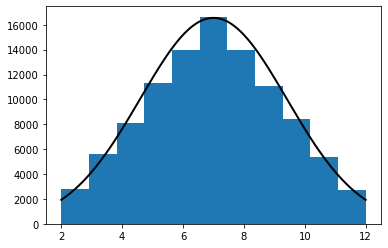

In [17]:
from scipy.stats import norm

plt.hist(results,11)

x_model = np.linspace(2,12,10000)
y_model = norm.pdf(x_model, 7, 2.41)*num_samples #Our Ansatz model
plt.plot(x_model, y_model, 'k', linewidth=2)

A more formal way to test how "normal" a given distribution is could be the _Jarqu-Bera_ test, which uses the Kurtosis and Skewness of a given distribution to test for normality using the following eq:

$$JB = \frac{n}{6}\left( S^2 + (K-3)^2\right)$$

where $JB \in \mathbb{R}^+$ is the test statistic, $n$ is the number of samples (degrees of freedom), $S$ is the Skewness of the distribution and $K$ is the Kurtosis. A large value of JB indicates that the distribution is not normal

### Python Implementation


Here we'll use the dataset above, which is stored in the list `results`

In [18]:
jarqe_bera_test = sci.stats.jarque_bera(np.histogram(results,11)[0])

print('JB = ',jarqe_bera_test.statistic)
print('p-value = ', jarqe_bera_test.pvalue)
print('')
print('As you can see, the p-value is significantly greater than 5% meaning that we can accept the hyptothesis that results is roughly normal')

JB =  0.6789958470222006
p-value =  0.7121277756339978

As you can see, the p-value is significantly greater than 5% meaning that we can accept the hyptothesis that results is roughly normal


Note: there exist better normality tests. 

<hr>

## Quick Aside: 

There are a plathora of plots one can consider using to present their data in finance. The following is a good reference for the most commonly used ones: [click here](https://www.cfainstitute.org/en/membership/professional-development/refresher-readings/organizing-visualizing-and-describing-data).


One might find [Seaborn](https://seaborn.pydata.org/), a python library that makes plotting advanced figures as simple as a single line of code, helpful. I whipped up a quick [jupyter notebook](https://github.com/theheavygluon/Risk-Management-Course/blob/main/Seaborn_Stuff.pdf) which you can use as a reference (although the resources on their official site are great).

<hr>


## Two dimensional data

Up until now, all of the data we've dealt with is unidimensional (e.g stock prices, results of rolling a dice 10000 times, ect). In finance (and beyond), there are several cases where this is not the case. You could have any number of dimensions to represent data. In the case where the data is 2D (e.g \\$MARA returns vs \\$RIOT returns, where \\$MARA  and \\$RIOT are both crypto mining companies). Graphically, one can represent 2D data in the following ways:

1. Scatter-plots
2. Contingency table
3. Box Plot
4. K0-plot

And several more. 

Here I've coded up a few examples.


#### Scatter Plot:

The following block implements a scatterplot between \\$MARA prices and \\$RIOT (two companies that basically do the same thing)

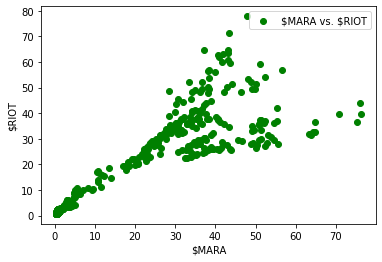

In [45]:
mara = get_stock_price('MARA','01-01-2020','01-01-2022') #MARA prices
riot = get_stock_price('RIOT','01-01-2020','01-01-2022') #RIOT prices

plt.scatter(mara,riot, color='green',label='\$MARA vs. \$RIOT')#Scatter plot. Everything after this line is for design
plt.xlabel('\$MARA')
plt.ylabel('\$RIOT')
plt.legend()

#### Contingency table:

The following block implements a Contingency table for a dataset that shows information for 20 different product orders, including the type of product purchased (TV, computer, or radio) along with the country (A, B, or C) that the product was purchased in.

In [48]:
#Source: https://www.statology.org/contingency-table-python/

#create data
df = pd.DataFrame({'Order': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'Product': ['TV', 'TV', 'Comp', 'TV', 'TV', 'Comp',
                               'Comp', 'Comp', 'TV', 'Radio', 'TV', 'Radio', 'Radio',
                               'Radio', 'Comp', 'Comp', 'TV', 'TV', 'Radio', 'TV'],
                   'Country': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})
#contingency table

pd.crosstab(index=df['Country'], columns=df['Product'], margins=True)

Product,Comp,Radio,TV,All
Country,,,,
A,1,0,3,4
B,3,2,3,8
C,2,3,3,8
All,6,5,9,20


#### Box Plot: 

The following block implements a boxplot for random numpy-generated data

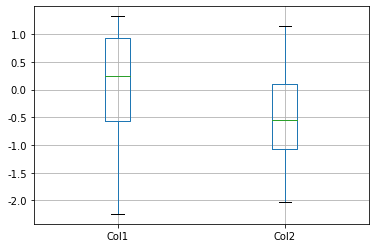

In [72]:
#Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 3),
                  columns=['Col1', 'Col2', 'Col3'])

boxplot = df.boxplot(column=['Col1', 'Col2'])  

### Correlation

Say one has datasets $X$ and $Y$, the _correlation_ is essentially a measure of how one dataset moves with respect to the other (or rather how strong their relationship is). It is usually represented by $r \in (-1,1)$, a metric called the _Bravais-Pearson_ coeffecient which is very commonly used to represent correlation. It is defined as follows:

$$r_{XY} = \frac{\sum_{i = 1}^n (x_i - \hat{x})(y_i - \hat{y})}{\sqrt{\sum_{i = 1}^n (x_i - \hat{x})^2}\sqrt{\sum_{i = 1}^n (y_i - \hat{y})^2}} = \frac{\sigma_{XY}}{\sigma_X * \sigma_Y}$$

where $\sigma_{XY}$ denotes the empirical covariance, and $\sigma_{\mu}$ denotes the empirical standard deviation of some dataset $\mu$.

A -1 correlation indicates that two datasets are perfectly correlated but in opposing directions (as $X$ increases, $Y$ decreases proportionally). A +1 correlation indicates that two datasets are perfectly correlated in the same direction (as $X$ increases, $Y$ increases proportionally). A 0 correlation means that the two given datasets are completely independent of one another (i.e the movement of $X$ gives 0 prediction power over the movement of $Y$)

#### Python Implementation 

Looking back at the scatterplot, one can find that I use MARA and RIOT as an example. I state that they are two crypto mining companies that do roughly the same thing. For this reason, their stock prices are likely to react similarly to various catalysts (e.g a surge in BTC mining interest) and even have very similar fundamentals. For this reason, one could assume that they are highly correlated assets. Let's use scipy to find out

In [74]:
scistats.pearsonr(mara,riot)[0] ##Getting the correlation coefficient (MARA,RIOT)

0.8884162228188631

As you can see, they are highly correlated!

## TOPICS LEFT

- Maximum Likelihood Estimation
- Linear and Generalized Linear Model
- Machine Learning

# 

In [64]:
np.random.seed?